In [1]:
setwd("~/Documents/DE/2019/")
require(ggplot2)
require(nlme)
require(multcomp)

Loading required package: ggplot2
Loading required package: nlme
Loading required package: multcomp
Loading required package: mvtnorm
Loading required package: survival
Loading required package: TH.data
Loading required package: MASS

Attaching package: ‘TH.data’

The following object is masked from ‘package:MASS’:

    geyser



In [4]:
d=read.csv("DE2019_weights.csv")

In [5]:
head(d)

Bucket,Color.Number,Size,Species,Date_initial_measure,Length_pre,Width_pre,Height_pre,Weight,Mortality_Date,Weight_post,Label
<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>,<lgl>,<fct>,<fct>,<fct>,<fct>,<fct>
hsHM1,W1,,CV,,NA,NA,,1.89,,2.49,DE19_hsHM1_CV_W1
hsHM1,W2,,CV,,NA,NA,,1.32,,1.33,DE19_hsHM1_CV_W2
hsHM1,W3,,CV,,NA,NA,,1,,1.15,DE19_hsHM1_CV_W3
hsHM1,W4,,CV,,NA,NA,,1.43,,1.68,DE19_hsHM1_CV_W4
hsHM1,W5,,CV,,NA,NA,,2.01,,2.4,DE19_hsHM1_CV_W5
hsHM1,W6,,CV,,NA,NA,,1.63,,1.71,DE19_hsHM1_CV_W6


In [6]:
colnames(d)

[1] "Bucket"               "Color.Number"         "Size"                
 [4] "Species"              "Date_initial_measure" "Length_pre"          
 [7] "Width_pre"            "Height_pre"           "Weight"              
[10] "Mortality_Date"       "Weight_post"          "Label"

In [16]:
#separate treatments
d$Density=ifelse(substr(d$Bucket,3,3)=="L", "Low", "High")
d$Diversity=ifelse(substr(d$Bucket,4,4)=="P", "Poly", "Mono")
d$Salinity=ifelse(substr(d$Bucket,1,1)=="l", "Low", "High")

In [20]:
cv=d[d$Species=="CV"& !is.na(d$Weight_post)& !is.na(d$Weight),]

In [22]:
cv$Weight_post=as.numeric(as.character(cv$Weight_post))
cv$Weight=as.numeric(as.character(cv$Weight))
cv$Weight_change=cv$Weight_post-cv$Weight

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

In [23]:
head(cv)

Bucket,Color.Number,Size,Species,Date_initial_measure,Length_pre,Width_pre,Height_pre,Weight,Mortality_Date,Weight_post,Label,Density,Diversity,Salinity,Weight_change
<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>,<lgl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<chr>,<chr>,<chr>,<dbl>
hsHM1,W1,,CV,,NA,NA,,1.89,,2.49,DE19_hsHM1_CV_W1,High,Mono,High,0.60
hsHM1,W2,,CV,,NA,NA,,1.32,,1.33,DE19_hsHM1_CV_W2,High,Mono,High,0.01
hsHM1,W3,,CV,,NA,NA,,1.00,,1.15,DE19_hsHM1_CV_W3,High,Mono,High,0.15
hsHM1,W4,,CV,,NA,NA,,1.43,,1.68,DE19_hsHM1_CV_W4,High,Mono,High,0.25
hsHM1,W5,,CV,,NA,NA,,2.01,,2.40,DE19_hsHM1_CV_W5,High,Mono,High,0.39
hsHM1,W6,,CV,,NA,NA,,1.63,,1.71,DE19_hsHM1_CV_W6,High,Mono,High,0.08


In [24]:
#funciton to calculate se and average at once
multi = function(x) {
      c(avg = mean(x, na.rm=TRUE), se = sd(x, na.rm=TRUE)/sqrt(length(x)) )
}

In [30]:
weight=aggregate(Weight_change~Density+Diversity+Salinity, data=cv, FUN=multi)
weight$avg=weight$Weight_change[,1]
weight$sd=weight$Weight_change[,2]
weight=weight[-4]

In [31]:
head(weight)

Density,Diversity,Salinity,avg,sd
<chr>,<chr>,<chr>,<dbl>,<dbl>
High,Mono,High,0.3261176,0.02857547
Low,Mono,High,0.6029412,0.03624057
High,Poly,High,0.4417886,0.02832830
Low,Poly,High,0.5880315,0.02961066
High,Mono,Low,0.2684694,0.02654379
Low,Mono,Low,0.4713115,0.02819815


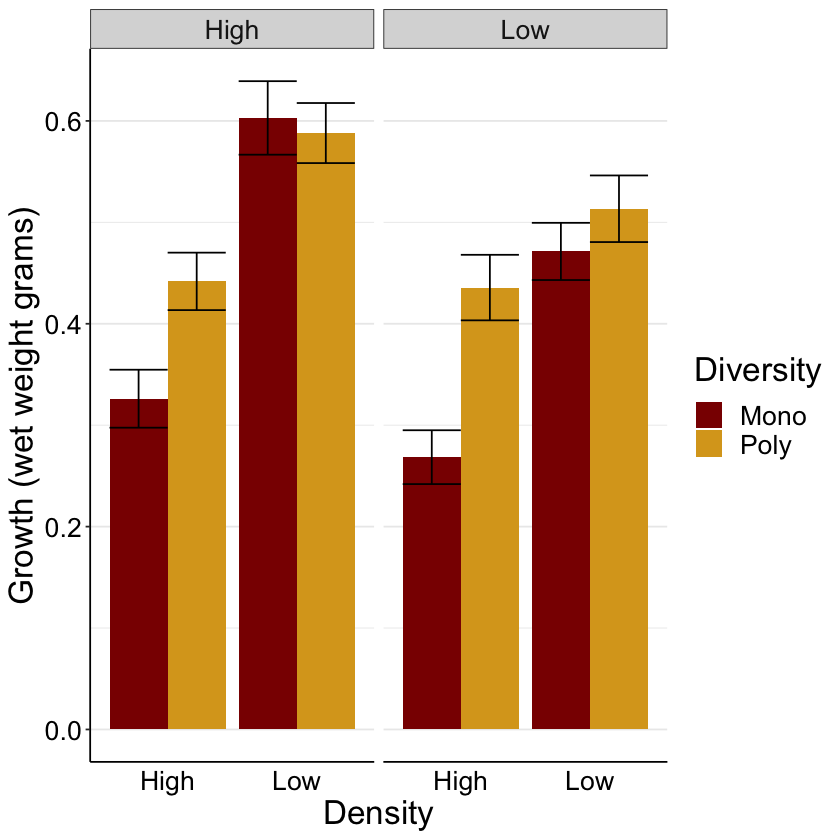

In [35]:
ggplot(weight, aes(x = Density, y = avg, fill=Diversity)) +
facet_grid(. ~ Salinity)+
scale_fill_manual(values=c("darkred", "goldenrod"))+
        geom_bar(stat="identity", position="dodge")+
 geom_errorbar(aes(ymin=avg-sd, ymax=avg+sd), position="dodge") +
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))+
ylab("Growth (wet weight grams)")